In [2]:
#=====================================================
#=====================================================
# Analysis
#=====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Invert IPD
def model(DataSet_A,Pars_mu):
    Process_Num = DataSet_A.shape[0]
    Position_Nums = Pars_mu.shape[0]
    print("Starting griding...........")

    GridID_tem = np.zeros(shape = (Process_Num),dtype = float)
    Pars_mu_minus = np.zeros(shape = (Pars_mu.shape),dtype = float)
    for n in np.arange(Process_Num):
        for i in np.arange(Pars_mu.shape[0]):
            Pars_mu_minus[i,:] = DataSet_A[n,:] - Pars_mu[i,:]
        GridID_tem[n] = np.sum(Pars_mu_minus**2,axis = 1).argmin() # Find best site grid


    Grided_Data = pd.Series(data = GridID_tem)
    GridID_index = np.array(Grided_Data.value_counts().index).astype(int) # IDs for grids has Gammas
    GridID_Distri_P = np.array(Grided_Data.value_counts()) / Process_Num # Normalizing
    Inverted_Distri_P = np.zeros(shape = (Position_Nums),dtype = float)
    Inverted_Distri_P[GridID_index] = GridID_Distri_P # p_i
    print("Process Gamma num is:",Process_Num)
    print("IPD cell counts / Cells =",GridID_index.shape[0],"/",Position_Nums)
    return Inverted_Distri_P

# Loading files
#======================================
Gamma_Num = 10000
IterNUM = 100   #python
IterNUM1 = 200   #c++
Num_npy = '_{:.0f}.npy'.format(Gamma_Num)
Num_npy1 = '_{:.0f}_{:.0f}.npy'.format(Gamma_Num,IterNUM)
Num_bin1 = '_{:.0f}_{:.0f}.bin'.format(Gamma_Num,IterNUM1)

#DataSet_A
DataSet_A = np.load('data/Result_Gamma/Gamma_data_DataSetA' + Num_npy)
#Pars_mu
mean_PhotonSim_Pars_mu = np.load('data/Result_Gamma/mean_PhotonSim_Pars_mu.npy') # Calculated
#Iteration Results  python
# Pars_mu_end = np.load('data/Results_Iteration/Pars_mu_end_f2' + Num_npy1) 
# costs = np.load('data/Results_Iteration/cost_end_f2' + Num_npy1)
#Iteration Results CPlus
Pars_mu_end_CPlus = np.fromfile('data/Results_Iteration/CPlus_Pars_mu_end' + Num_bin1,dtype = np.float32) 
costs_Cplus = np.fromfile('data/Results_Iteration/CPlus_Cost_function_value' + Num_bin1,dtype = np.float32)
Pars_mu_end_CPlus.shape = round(Pars_mu_end_CPlus.shape[0]/72),72
costs_Cplus.shape = round(costs_Cplus.shape[0]/2),2
#Real IPD
Real_Distri_P = np.load("data/Result_Gamma/Gamma_data_Real_IPD" + Num_npy)  


In [3]:
# Inverting IPD
#======================================
Inverted_Distri_P_Real_Photon_Wis = model(DataSet_A,mean_PhotonSim_Pars_mu) # Calculated
# Inverted_Distri_P_end = model(DataSet_A,Pars_mu_end) #Iteration
Inverted_Distri_P_end_CPlus = model(DataSet_A,Pars_mu_end_CPlus) #Iteration


Starting griding...........
Process Gamma num is: 10000
IPD cell counts / Cells = 8 / 8
Starting griding...........
Process Gamma num is: 10000
IPD cell counts / Cells = 8 / 8


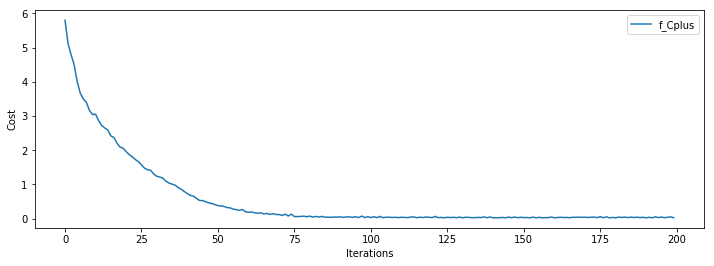

In [4]:
# Drawling pictures
#======================================
# Draw Costs
fig, ax = plt.subplots(figsize=(12,4))
# ax.plot(np.arange(len(costs[:,0])), costs[:,0] , label = 'f1')
# ax.plot(np.arange(len(costs[:,1])), costs[:,1], label = 'f2')
ax.plot(np.arange(len(costs_Cplus[:,1])), costs_Cplus[:,1], label = 'f_Cplus')
# ax.plot(np.arange(len(costs[:,2])), costs[:,2], label = 'f1 + f2')
plt.legend(loc = 'best')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
#plt.title('logf1,f2')
plt.savefig("picture/1.png")

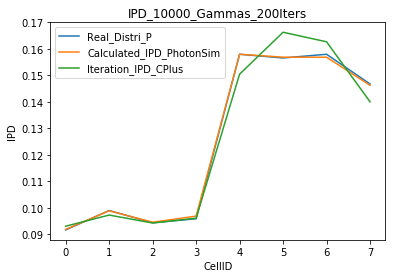

In [6]:
# Draw IPD
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(np.arange(len(Real_Distri_P)), Real_Distri_P,label = 'Real_Distri_P')
ax1.plot(np.arange(len(Inverted_Distri_P_Real_Photon_Wis)), Inverted_Distri_P_Real_Photon_Wis,label = 'Calculated_IPD_PhotonSim')
# ax1.plot(np.arange(len(Inverted_Distri_P_end)), Inverted_Distri_P_end,label = 'Iteration_IPD_Python')
ax1.plot(np.arange(len(Inverted_Distri_P_end_CPlus)), Inverted_Distri_P_end_CPlus,label = 'Iteration_IPD_CPlus')
plt.legend(loc = 'best')
ax1.set_xlabel('CellID')
ax1.set_ylabel('IPD')
plt.title('IPD_{:.0f}_Gammas_{:.0f}Iters'.format(Gamma_Num,IterNUM1))

plt.savefig("picture/IPD.png")



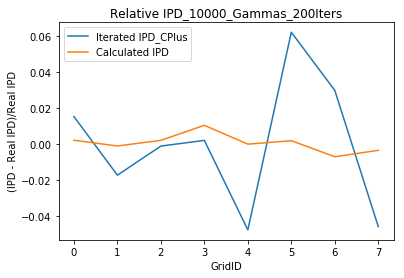

In [7]:
# Draw relative IPD
fig, ax2 = plt.subplots(figsize=(6,4))
# ax2.plot(np.arange(len(Inverted_Distri_P_end)), (Inverted_Distri_P_end - Real_Distri_P)/Real_Distri_P,label = 'Iterated IPD_Python')
ax2.plot(np.arange(len(Inverted_Distri_P_end_CPlus)), (Inverted_Distri_P_end_CPlus - Real_Distri_P)/Real_Distri_P,label = 'Iterated IPD_CPlus')
ax2.plot(np.arange(len(Inverted_Distri_P_Real_Photon_Wis)), (Inverted_Distri_P_Real_Photon_Wis - Real_Distri_P)/Real_Distri_P,label = 'Calculated IPD')
plt.legend(loc = 'best')
ax2.set_xlabel('GridID')
ax2.set_ylabel('(IPD - Real IPD)/Real IPD')
plt.title('Relative IPD_{:.0f}_Gammas_{:.0f}Iters'.format(Gamma_Num,IterNUM1))

plt.savefig("picture/Relative_IPD.png")

NameError: name 'Pars_mu_end' is not defined

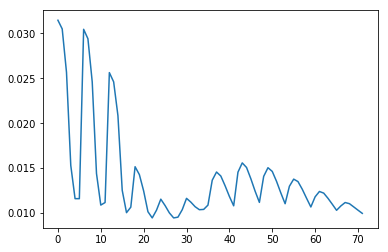

In [8]:
# Draw Pars_mu
fig, ax3 = plt.subplots(figsize=(6,4))
ax3.plot(np.arange(mean_PhotonSim_Pars_mu.shape[1]), mean_PhotonSim_Pars_mu[0,:],label = 'mean_PhotonSim_Pars_mu')
ax3.plot(np.arange(Pars_mu_end.shape[1]), Pars_mu_end[0,:],label = 'Pars_mu_end')
plt.legend(loc = 'best')
ax2.set_xlabel('GridID')
ax2.set_ylabel('Pars_mu')
plt.title('Pars_mu_{:.0f}_Gammas_{:.0f}Iters'.format(Gamma_Num,IterNUM))

plt.savefig("picture/Pars_mu.png")

In [39]:
mean_PhotonSim_Pars_mu.shape

(8, 72)

In [40]:
Pars_mu_end

array([[0.04064048, 0.05119261, 0.04108645, 0.02516366, 0.01431808,
        0.00879319, 0.05105855, 0.07192997, 0.0495435 , 0.02802822,
        0.01567801, 0.00950069, 0.04085876, 0.0522149 , 0.03974758,
        0.02371532, 0.01432816, 0.00898933, 0.02590421, 0.02825125,
        0.02423332, 0.01750417, 0.01172043, 0.00776723, 0.01408709,
        0.01540947, 0.01490233, 0.01182135, 0.0084962 , 0.00617572,
        0.00905161, 0.0093218 , 0.00891951, 0.00782116, 0.00635064,
        0.00500796, 0.0059273 , 0.00610173, 0.00626707, 0.00600015,
        0.00495929, 0.00421409, 0.00570499, 0.00606497, 0.00610659,
        0.00623094, 0.00546324, 0.00433749, 0.00551501, 0.00573257,
        0.00618062, 0.00567588, 0.00514856, 0.00431915, 0.00467459,
        0.0055438 , 0.00596621, 0.00548311, 0.00489088, 0.00410324,
        0.00475924, 0.00530546, 0.00533992, 0.00492181, 0.00399381,
        0.00329718, 0.00384837, 0.00438026, 0.00393976, 0.00351871,
        0.00347185, 0.00307922],
       [0.00935